<a href="https://colab.research.google.com/github/Alexiagmz/Actividad-1/blob/main/Actividad1_diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
# Cargar archivo CSV de Barcelona
data = pd.read_csv("diamonds.csv")
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [4]:
#Identificar valores nulos por columna .isnull()
valores_nulos=data.isnull().sum()
valores_nulos

,0
carat,3
cut,0
color,0
clarity,0
depth,2
table,3
price,3
x,1
y,1
z,4


In [5]:
# Realizar una copia del dataframe original para no modificarlo directamente
data1 = data.copy()

In [6]:
# Sustituir valores nulos en 'price' por mean de los precios
data1["carat"]=data1["carat"].fillna(round(data["carat"].mean(),1))
data1["depth"]=data1["depth"].fillna(round(data["depth"].mean(),1))
data1["table"]=data1["table"].fillna(round(data["table"].mean(),1))
data1["price"]=data1["price"].fillna(round(data["price"].mean(),1))
data1["x"]=data1["x"].fillna(round(data["x"].mean(),1))
data1["y"]=data1["y"].fillna(round(data["y"].mean(),1))
data1["z"]=data1["z"].fillna(round(data["z"].mean(),1))

In [7]:
#Identificar valores nulos por columna .isnull()
valores_nulos=data1.isnull().sum()
valores_nulos

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


OUTLIERS

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [9]:
Cuantitativas=data1.iloc[:,[0,4,5,6,7,8,9]]
Cualitativas=data1.iloc[:,[1,2,3]]

<Figure size 1500x800 with 0 Axes>

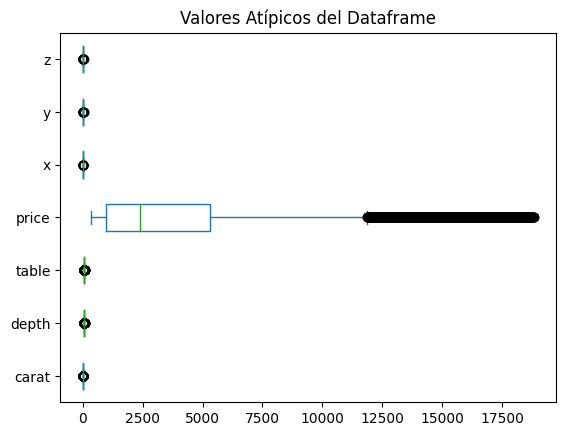

In [10]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [11]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=Cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido carat        2.219953
depth       66.047217
table       64.160560
price    15901.154414
x            9.096441
y            9.160929
z            5.655794
dtype: float64
Limite inferior permitido carat      -0.624090
depth      57.451571
table      50.753974
price   -8035.391985
x           2.365894
y           2.308121
z           1.421668
dtype: float64


In [12]:
#Obtenemos datos y los outliners se convierten en nulos en el dataframe
Cuantitativas1=Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Cuantitativas1

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,NaN,NaN,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [13]:
# Identificar valores nulos por columna después de eliminar outliers
valores_nulos_outliers = Cuantitativas1.isnull().sum()
valores_nulos_outliers

,0
carat,439
depth,685
table,336
price,1206
x,43
y,34
z,55


In [14]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos copia del df
Cuantitativas_limpio=Cuantitativas1.copy()
Cuantitativas_limpio=Cuantitativas_limpio.fillna(round(Cuantitativas1.mean(),1))
Cuantitativas_limpio

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [15]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Cuantitativas_limpio.isnull().sum()
valores_nulos_final

,0
carat,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [16]:
Valores_limpios=pd.concat([Cuantitativas_limpio,Cualitativas],axis=1)
Valores_limpios

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,Premium,E,SI1
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31,Good,E,VS1
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,Good,J,SI2
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50,Ideal,D,SI1
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61,Good,D,SI1
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56,Very Good,D,SI1
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74,Premium,H,SI2


In [ ]:
#Valores_limpios.to_csv("diamonds_limpios.csv")

CORRELACION

In [23]:
# Calcular la matriz de correlación
correlation_matrix = Cuantitativas_limpio.corr()

# Seleccionar las variables relevantes para el análisis
variables = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
correlation_values = correlation_matrix.loc[variables, 'price']

# Mostrar los coeficientes de correlación
print("Coeficientes de correlación con respecto al precio:")
print(correlation_values)

Coeficientes de correlación con respecto al precio:
carat    0.850727
depth   -0.002363
table    0.128089
x        0.842960
y        0.844283
z        0.840151
price    1.000000
Name: price, dtype: float64


In [24]:
# Graficar los diagramas de dispersión
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

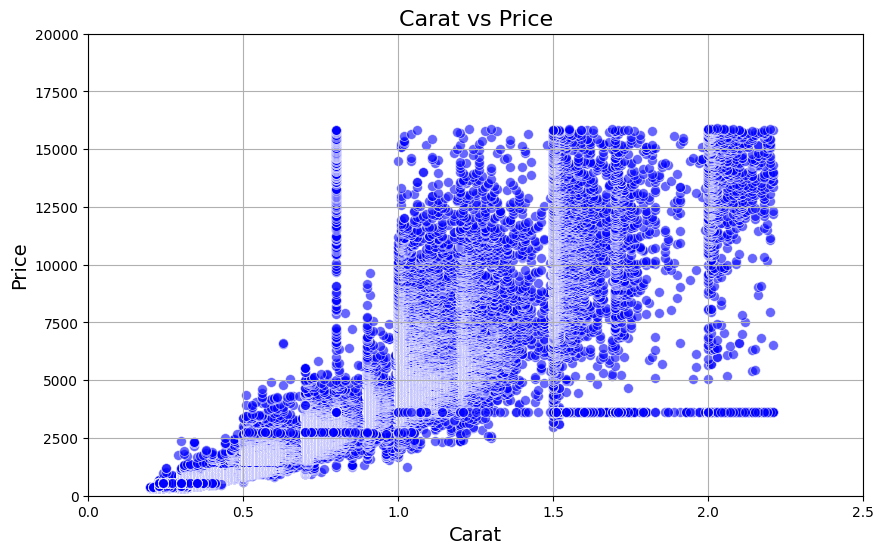

In [31]:
# a) Carat vs Price
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura
sns.scatterplot(data=Valores_limpios, x='carat', y='price', color='blue', s=50, alpha=0.6)  # Cambia el tamaño de los puntos
plt.title('Carat vs Price', fontsize=16)
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlim(0, 2.5)  # Ajusta los límites del eje X
plt.ylim(0, 20000)  # Ajusta los límites del eje Y
plt.grid(True)  # Agrega una cuadrícula
plt.show()

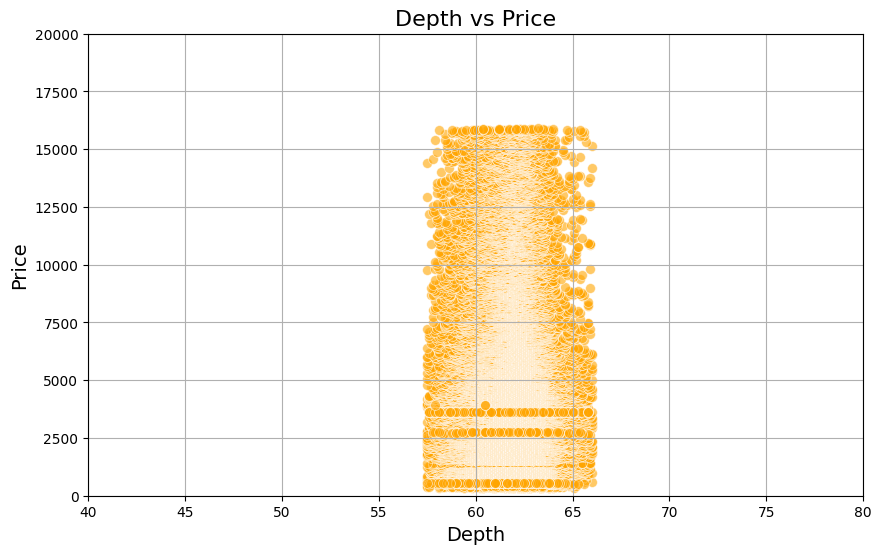

In [34]:
# b) Depth vs Price
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura
sns.scatterplot(data=Valores_limpios, x='depth', y='price', color='orange', s=50, alpha=0.6)  # Cambia el tamaño de los puntos
plt.title('Depth vs Price', fontsize=16)
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlim(40, 80)
plt.ylim(0, 20000)
plt.grid(True)  # Agrega una cuadrícula
plt.show()

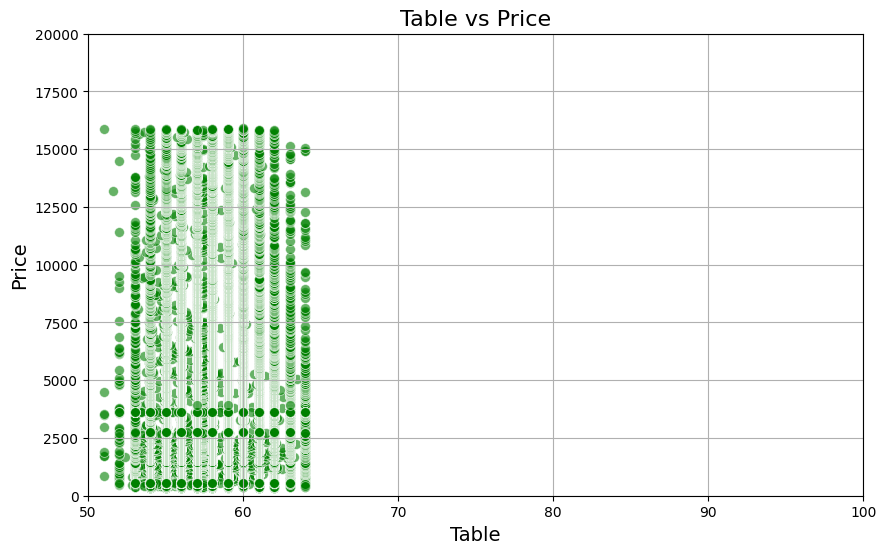

In [35]:
# c) Table vs Price
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura
sns.scatterplot(data=Valores_limpios, x='table', y='price', color='green', s=50, alpha=0.6)  # Cambia el tamaño de los puntos
plt.title('Table vs Price', fontsize=16)
plt.xlabel('Table', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlim(50, 100)
plt.ylim(0, 20000)
plt.grid(True)  # Agrega una cuadrícula
plt.show()

Text(0.5, 1.0, 'Carat and Depth')

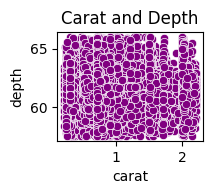

In [36]:
# d) Carat and Depth vs Price
plt.subplot(3, 3, 4)
sns.scatterplot(data=Valores_limpios, x='carat', y='depth', color='purple')
plt.title('Carat and Depth')

Text(0.5, 1.0, 'Carat and Table')

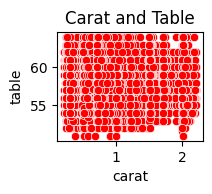

In [37]:
# e) Carat and Table vs Price
plt.subplot(3, 3, 5)
sns.scatterplot(data=Valores_limpios, x='carat', y='table', color='red')
plt.title('Carat and Table')

Text(0.5, 1.0, 'Depth and Table')

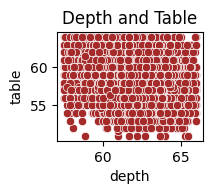

In [38]:
# f) Depth and Table vs Price
plt.subplot(3, 3, 6)
sns.scatterplot(data=Valores_limpios, x='depth', y='table', color='brown')
plt.title('Depth and Table')

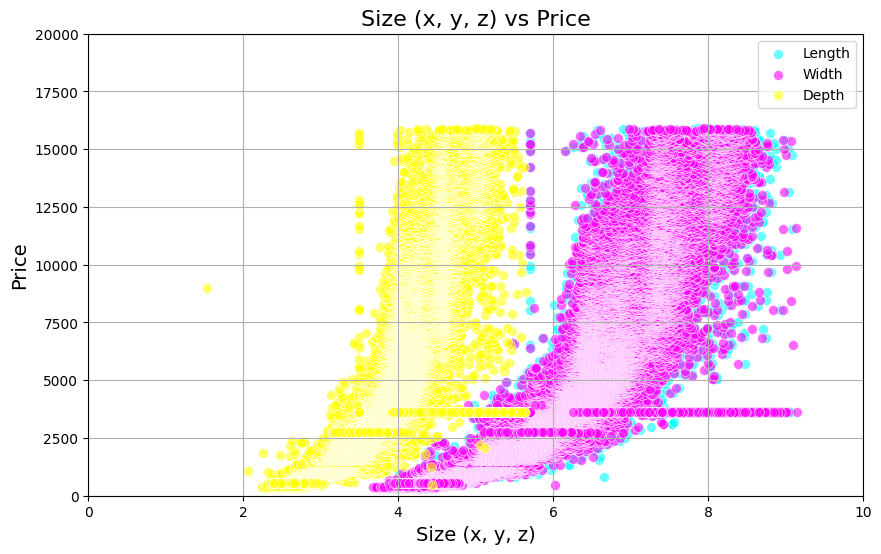

In [40]:
# g) Size (x, y, z) vs Price
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura
sns.scatterplot(data=Valores_limpios, x='x', y='price', label='Length', color='cyan', s=50, alpha=0.6)
sns.scatterplot(data=Valores_limpios, x='y', y='price', label='Width', color='magenta', s=50, alpha=0.6)
sns.scatterplot(data=Valores_limpios, x='z', y='price', label='Depth', color='yellow', s=50, alpha=0.6)

plt.title('Size (x, y, z) vs Price', fontsize=16)
plt.xlabel('Size (x, y, z)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlim(0, 10)
plt.ylim(0, 20000)
plt.grid(True)
plt.legend()
plt.show()


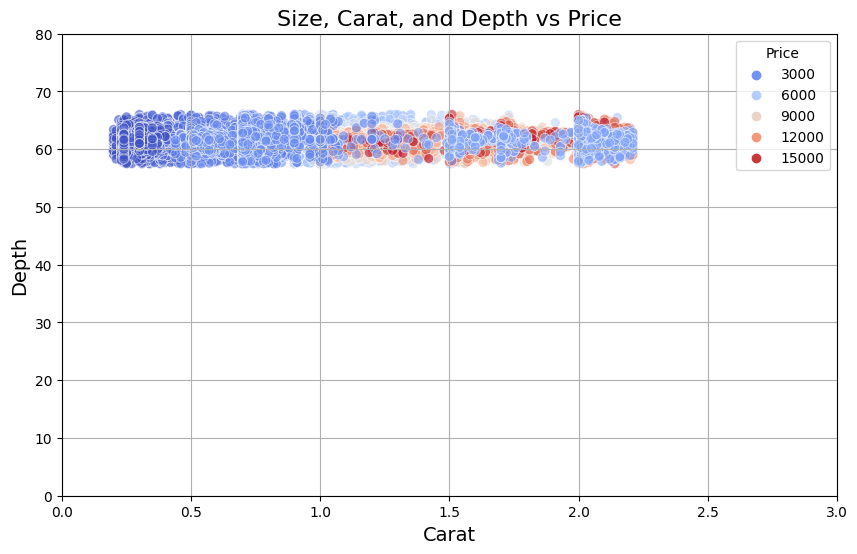

In [43]:
# h) Size, Carat, and Depth vs Price
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura
sns.scatterplot(data=Valores_limpios, x='carat', y='depth', hue='price', palette='coolwarm', s=50, alpha=0.6)

plt.title('Size, Carat, and Depth vs Price', fontsize=16)
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Depth', fontsize=14)
plt.xlim(0, 3)
plt.ylim(0, 80)
plt.grid(True)  # Agrega una cuadrícula
plt.legend(title='Price')  # Agrega una leyenda con título
plt.show()


In [44]:
# Análisis breve de los coeficientes de correlación
correlation_analysis = pd.DataFrame(correlation_values).reset_index()
correlation_analysis.columns = ['Variable', 'Correlation with Price']

In [45]:
# Mostrar la tabla comparativa
print("\nTabla comparativa de correlación con el precio:")
print(correlation_analysis)


Tabla comparativa de correlación con el precio:
  Variable  Correlation with Price
0    carat                0.850727
1    depth               -0.002363
2    table                0.128089
3        x                0.842960
4        y                0.844283
5        z                0.840151
6    price                1.000000


In [46]:
# Determinar las variables que influyen más en el precio
influential_variables = correlation_analysis[correlation_analysis['Correlation with Price'].abs() > 0.3]
print("\nVariables que influyen significativamente en el precio:")
print(influential_variables)


Variables que influyen significativamente en el precio:
  Variable  Correlation with Price
0    carat                0.850727
3        x                0.842960
4        y                0.844283
5        z                0.840151
6    price                1.000000
